# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import sklearn

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
print(type(train))
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
 
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print(type(X_train))

<class 'dict'>
<class 'numpy.ndarray'>


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
#n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
#print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

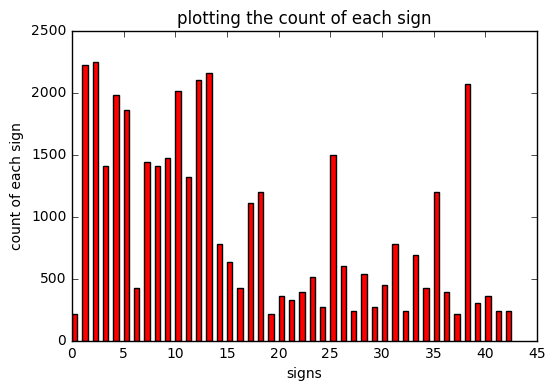

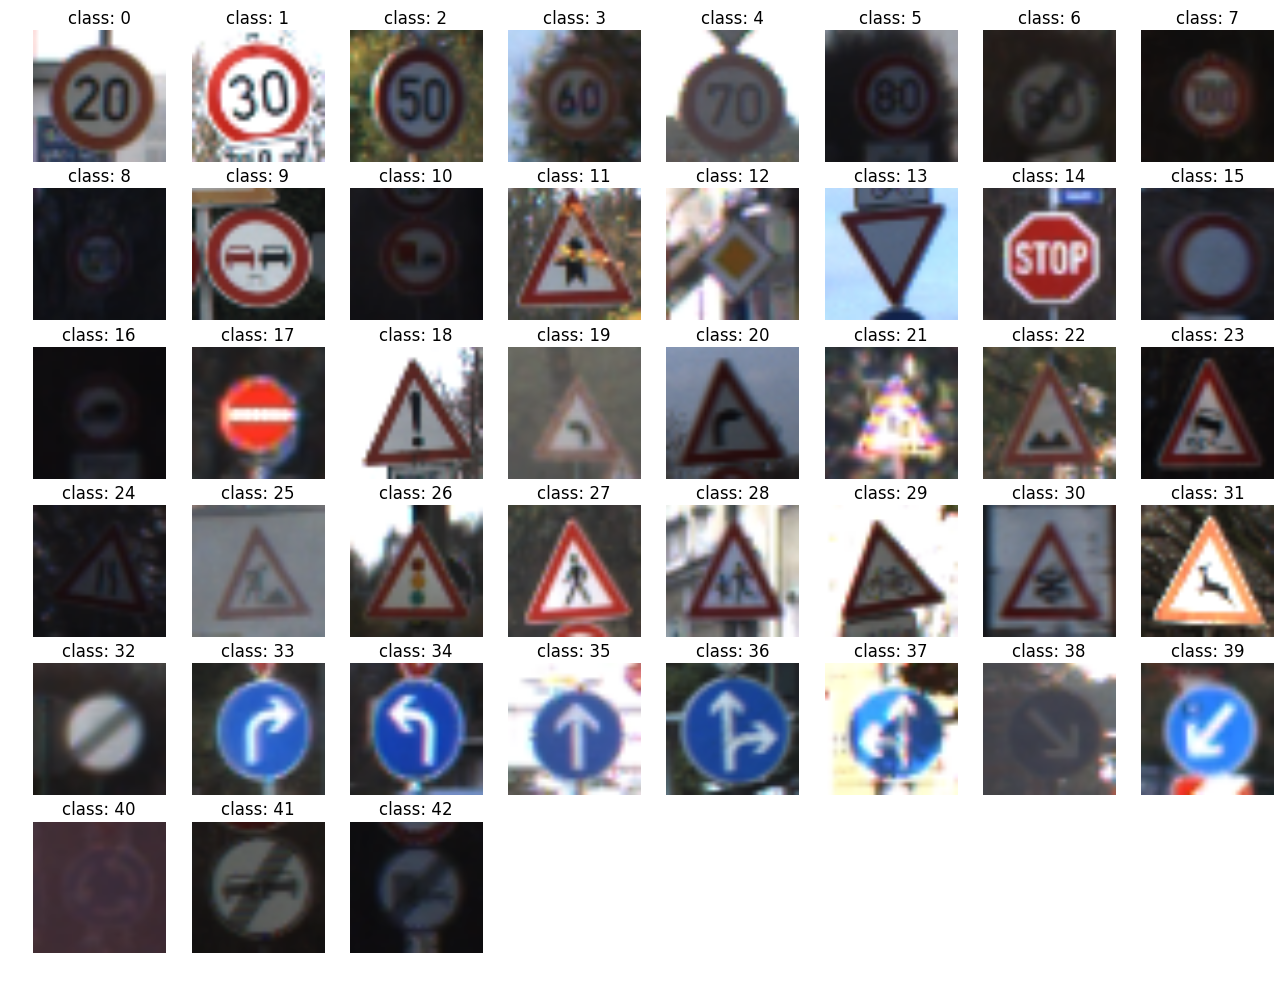

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
import numpy as np
import cv2
plt.figure(figsize=(1,1))
fig, ax = plt.subplots()
ax.bar(range(n_classes), np.bincount(y_train), 0.5, color='r')
ax.set_xlabel('signs')
ax.set_ylabel('count of each sign')
ax.set_title('plotting the count of each sign')
plt.show()

plt.figure(figsize=(16, 16))
for c in range(n_classes):
    i = random.choice(np.where(y_train == c)[0])
    plt.subplot(8, 8, c+1)
    plt.axis('off')
    plt.title('class: {}'.format(c))
    plt.imshow(X_train[i])
    cv2.imwrite(str(c)+'test.png',X_train[i])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**  a Gaussian blur is used to reduce image noise and reduce detail. 

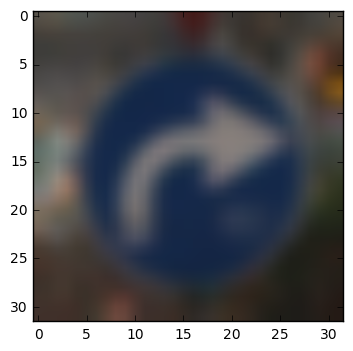

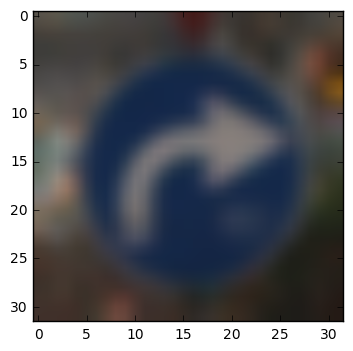

In [4]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
### Preprocess the data here.
### Feel free to use as many code cells as needed. a Gaussian blur (also known as Gaussian smoothing) is the result of blurring an image by a Gaussian function. It is a widely used effect in graphics software, typically to reduce image noise and reduce detail. 
import cv2

X_train_blur = X_train
X_test_blur = X_test
for index in range(0, len(X_train)):
    X_train_blur[index]=cv2.GaussianBlur(X_train[index],(3,3),0)
for index in range(0, len(X_test)):
    X_test_blur[index]=cv2.GaussianBlur(X_test[index],(3,3),0)
index = random.randint(0, len(X_train))
plt.figure()
plt.imshow(X_train_blur[index], cmap="gray")
plt.figure()
plt.imshow(X_train[index], cmap="gray")

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** The "training" data is splited into the ratio of 8:2 for training and validation. The "test" data is used for testing only.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train_blur, y_train, test_size = 0.2, random_state=42)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.   
Pooling. Input = 28x28x12. Output = 14x14x12.    
Layer 2: Convolutional. Output = 10x10x32.
Pooling. Input = 10x10x32. Output = 5x5x32.
Flatten. Input = 5x5x32. Output = 800.  
Layer 3: Fully Connected. Input = 800. Output = 240.
Layer 4: Fully Connected. Input = 240. Output = 168.
Layer 5: Fully Connected. Input = 168. Output = 86.
Layer 5: Fully Connected. Input = 86. Output = 43.

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 12, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x96. Output = 2400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 800. Output = 240.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1152, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 240. Output = 168.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 168), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(168))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 168. Output = 86.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(168, 86), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(86))
    fc3 = tf.matmul(fc2, fc3_W) + fc3_b
    
    # SOLUTION: Layer 5: Fully Connected. Input = 86. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(86, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    return logits
 

 ### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_

**Answer:** 

Answer:  

1,Please discuss how did you choose the optimzer. <br>
Answer: According to cs231n, Adam often works slightly better than RMSProp. In my test, GradientDescentOptimizer, RMSPropOptimizer and AdamOptimizer achieved 0.054, 0.899 and 0.890 respectfully. Therefore, RMSPropOptimizer and AdamOptimizer are the same. Finaly, I choose AdamOptimizer based on cs231n <br>

2,Please discuss how did you tell a convolutional layer is well suited for this problem.<br>
Answer: The convolutional layer is determined by the shape of input image. The shape of input image is (32x32x3), therefore the filter of layer must changed into (32x32x3).<br>

3,Please discuss how did you choose the particular activation <br>
Answer: In my test, Sigmoid, Tanh and ReLU achieved 0.914, 0.896 and 0.898 respectfully.
Finaly, I choose ReLU based on cs231n.<br>

4,Please discuss how did you tune the hyperparameter. <br>
Answer:
1) Number of filters<br>
I increase the number filters from 12 to 36 in layer one. Although computing time become longer, there is no significant improvement. <br>
2) Filter shape<br>
As Filter shape increases, the accuracy decreases in my test. For example, the validation accuracy of Filter shape(3, 3, 3, 12) is 0.01 higher than the validation accuracy of Filter shape(10, 10, 3, 12). Therefore, Filter shape(3, 3, 3, 12) is chosen <br>
3) Pooling Shape<br>
The 2x2 is used as pooling Shape. High pooling shape may result in throwing away too much information.<br>
4) Learning Rate <br>
According to cs231n, the curve of loss and epochs is expected to be a horizontal asymptote with good learning rate. Therefore the Validation Accuracies from all EPOCHs are plotted by turning the learning rate. Compared to other learning rates(i.e. 1, 0.1 and 0.01), the line chart of learning rate(0.001) looks more likely to be horizontal asymptote. <br>

In [7]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [8]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
The solution is based on the result of trials. 
At first, I started by modifying the Lenet codes from the course to work with the new image shapes. Then I conducted many trials with different hyperparameters. Please refer to previous questions. Finally, I choose the hyperparameters with hightest evaluation accuracy. 

5,Please discuss how did you train your model. <br>
Answer: The model is trained using the train.p file. The train.p is splited into two parts - train and validation. The weights on CNN are optimized on each EPOCH. After 15 EPOCHs, the training is completed. <br>

6,Please discuss how would you evaluate the model. <br>
Answer: The model is evaluated using the test.p file. Extra five images are also used for evaluation.<br>

In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [10]:
### Train your model here.
### Feel free to use as many code cells as needed.
ValidationAccuracy  =[]
from sklearn.utils import shuffle
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #X_train=X_train_gray.eval()
    #X_test=X_test_gray.eval()
    num_examples = len(X_train)
    
    print("Training...")
    print()
    EPOCHS = 15
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        ValidationAccuracy.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    saver = tf.train.Saver()
    save_path = saver.save(sess, './model.ckpt')

Training...

EPOCH 1 ...
Validation Accuracy = 0.788

EPOCH 2 ...
Validation Accuracy = 0.757

EPOCH 3 ...
Validation Accuracy = 0.921

EPOCH 4 ...
Validation Accuracy = 0.947

EPOCH 5 ...
Validation Accuracy = 0.943

EPOCH 6 ...
Validation Accuracy = 0.958

EPOCH 7 ...
Validation Accuracy = 0.924

EPOCH 8 ...
Validation Accuracy = 0.962

EPOCH 9 ...
Validation Accuracy = 0.969

EPOCH 10 ...
Validation Accuracy = 0.967

EPOCH 11 ...
Validation Accuracy = 0.968

EPOCH 12 ...
Validation Accuracy = 0.934

EPOCH 13 ...
Validation Accuracy = 0.974

EPOCH 14 ...
Validation Accuracy = 0.968

EPOCH 15 ...
Validation Accuracy = 0.972

Test Accuracy = 0.884


<class 'list'>


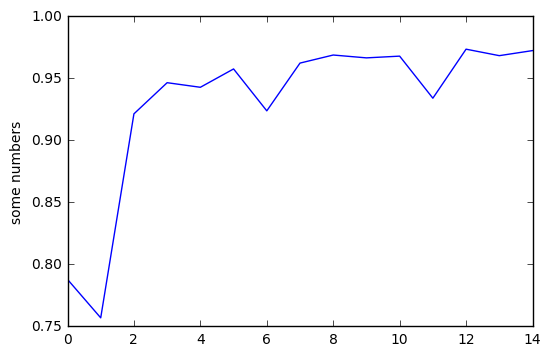

In [11]:
import matplotlib.pyplot as plt
print(type(ValidationAccuracy))
plt.plot(ValidationAccuracy)
plt.ylabel('some numbers')
plt.show()

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

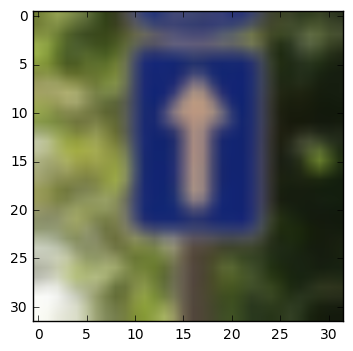

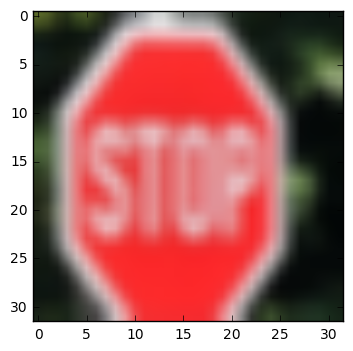

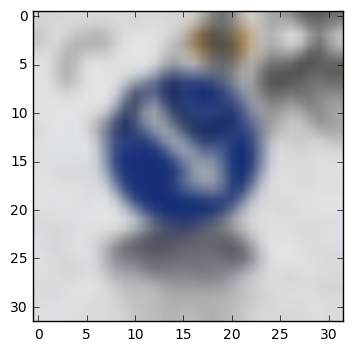

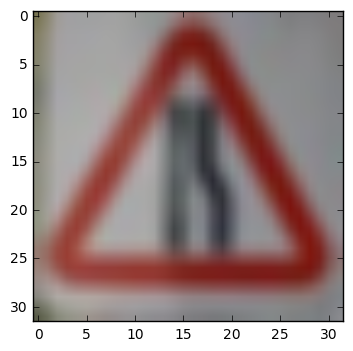

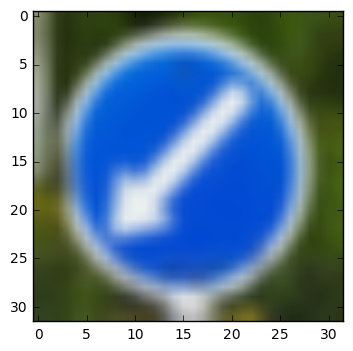

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import numpy as np
import tensorflow as tf
import cv2

test_images = ['1.png',
               '2.png', '3.png',
               '4.png', '5.png']
imgNewImages = []
for ima in test_images:
    img = cv2.imread('5pics/'+ima)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.GaussianBlur(img,(3,3),0)
    alpha = float(1)     # Simple contrast control 1.0-3.0
    beta = float(0)             # Simple brightness control    0-100
    img = cv2.multiply(img,np.array([alpha]))                    # mul_img = img*alpha
    img = cv2.add(img,np.array([beta]))                      # new_img = img*alpha + beta
    plt.figure()
    plt.imshow(img)
    imgNewImages.append(img)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**   After many tries, the contrast and brightness have a huge impact on the classification accuracy.
According to Ankan Bansal(a PhD student) from Quora, it is very hard to define the contrast and brightness for all images numerically .


In [13]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
 
imgNewImages=np.array(imgNewImages, dtype="uint8")
correctLabel = [35, 14, 38, 24, 39]
with tf.Session() as sess:     
    saver = tf.train.Saver()
    saver.restore(sess, './model.ckpt')
    accuracy = sess.run(tf.argmax(logits, 1), feed_dict={x: imgNewImages})
    print(accuracy) 

[34 14 38 18 33]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


## **Answer:**
 From the prediction I did to the candidate image, the testing accuracy is 89%, however, the model prediction accuracy on the training set was 80%. As a result, I believe my model did not perform well in the real world situation. The possible reasons would be:<br>
1, Compared to ResNet, the number of layers my model is very low. <br>
2, May try to use the concept of inception modules from GoogleNet.<br>
3, The image preprocessing methods may be too simple.<br>
4, Fully Connected layers need to be improved in the future.<br>

In [14]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:     
    saver = tf.train.Saver()
    saver.restore(sess, './model.ckpt')
    print(sess.run(tf.nn.softmax(logits), feed_dict={x: imgNewImages}))

[[  8.69960786e-07   8.74933050e-07   2.66786948e-08   8.33345726e-02
    4.55668097e-16   2.28591979e-01   1.08148106e-05   2.43452319e-04
    1.69360242e-03   4.01149464e-06   5.32427400e-08   5.33675229e-05
    6.79518877e-08   4.76060959e-05   1.14814789e-08   1.09510315e-14
    4.48091123e-06   7.38357726e-13   4.63406332e-13   1.86263298e-06
    9.51234233e-06   9.42718470e-05   2.25568564e-09   1.74988361e-06
    1.06665732e-09   1.55264502e-07   8.67461303e-09   1.09852849e-09
    1.59873348e-02   5.00166925e-06   3.36562425e-06   1.08904419e-06
    2.59586886e-06   1.26433586e-09   6.68741345e-01   1.03942747e-03
    2.01879757e-08   9.10318789e-08   2.32450311e-05   1.67621617e-09
    9.80586265e-05   9.86631679e-11   5.09835354e-06]
 [  1.01476400e-15   1.29228961e-09   1.02138299e-20   5.81639936e-37
    7.83392053e-17   4.54417336e-18   8.86437950e-23   1.81657677e-16
    6.55035780e-24   8.76327909e-23   8.81545155e-30   1.23634098e-19
    4.38349114e-20   3.34003214e-26 

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** Yes, The correct "Keep Right" prediction appears on No 2. The correct "Keep Left" prediction appears on No 2. The correct "Road narrows on the right" prediction does not appears on the top 5.  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [15]:
with tf.Session() as sess:     
    saver = tf.train.Saver()
    saver.restore(sess, './model.ckpt')
    print(sess.run(tf.nn.top_k(tf.nn.softmax(logits),5), feed_dict={x: imgNewImages}))

TopKV2(values=array([[  6.68741345e-01,   2.28591979e-01,   8.33345726e-02,
          1.59873348e-02,   1.69360242e-03],
       [  1.00000000e+00,   4.16804866e-08,   1.29228961e-09,
          3.37074796e-13,   1.07198742e-13],
       [  1.00000000e+00,   1.84943250e-09,   3.42894203e-12,
          2.87030380e-20,   2.06111526e-23],
       [  9.99982357e-01,   1.76832182e-05,   6.25951868e-09,
          5.96252145e-11,   1.77643036e-14],
       [  9.99918580e-01,   8.13937950e-05,   7.89432575e-10,
          6.53111196e-24,   9.37030554e-26]], dtype=float32), indices=array([[34,  5,  3, 28,  8],
       [14, 25,  1, 24, 26],
       [38, 13, 34, 40, 36],
       [18, 27, 24, 26, 29],
       [33, 39, 37, 40, 36]]))


Review Questions

Q1,Please discuss how did you choose the optimzer. (Missed Answer)<br>
Answer:  According to cs231n, Adam often works slightly better than RMSProp. In my test, GradientDescentOptimizer, RMSPropOptimizer and AdamOptimizer achieved 0.054, 0.899 and 0.890 respectfully. Therefore, RMSPropOptimizer and AdamOptimizer are the same. Finaly, I choose AdamOptimizer based on cs231n<br><br>
    
Q2,Please discuss how did you tell a convolutional layer is well suited for this problem. (Missed Answer)<br>
Answer:  The convolutional layer is determined by the shape of input image. The shape of input image is (32x32x3), therefore the filter of layer must changed into (32x32x3).<br> <br>
     

Q3,Please discuss how did you choose the particular activation (Missed Answer) <br>
Answer:  In my test, Sigmoid, Tanh and ReLU achieved 0.914, 0.896 and 0.898 respectfully.<br><br> Finaly, I choose ReLU based on cs231n.

Q4,Please discuss how did you tune the hyperparameter. (Missed Answer) <br>
Answer:   
1) Number of filters<br>
   I increase the number filters from 12 to 36 in layer one. Although computing time become longer, there is no significant improvement. <br>
   
2) Filter shape<br>
  As Filter shape increases, the accuracy decreases in my test. For example, the validation accuracy of Filter shape(3, 3, 3, 12) is 0.01 higher than the validation accuracy of Filter shape(10, 10, 3, 12). Therefore, Filter shape(3, 3, 3, 12) is chosen <br>
    
3) Pooling Shape<br>
  The 2x2 is used as pooling Shape. High pooling shape may result in throwing away too much information.<br><br>
    
4) Learning Rate <br>
  According to cs231n, the curve of loss and epochs is expected to be a horizontal asymptote with good learning rate. Therefore the Validation Accuracies from all EPOCHs are plotted by turning the learning rate. Compared to other learning rates(i.e. 1, 0.1 and 0.01), the line chart of learning rate(0.001) looks more likely to be horizontal asymptote. 
    
Q5,Please discuss how did you train your model. (Missed Answer)<br>
Answer:  The model is trained using the train.p file. The train.p is splited into two parts - train and validation.
The weights on CNN are optimized on each EPOCH. After 15 EPOCHs, the training is completed.  <br><br>

Q6,Please discuss how would you evaluate the model. (Missed Answer)<br>
Answer:  The model is evaluated using the test.p file. Extra five images are also used for evaluation.<br><br>
   
Q7,Please display at least five candidate images of traffic signs and discuss their classification difficulties.<br>
Answer:  After many tries, the contrast and brightness have a huge impact on the classification accuracy.  
According to Ankan Bansal(a PhD student) from Quora, it is very hard to define the contrast and brightness for all images numerically .<br><br>

Q8,Please compare the prediction accuracy of the result of the captured images with the testing set.<br>
Answer: From the prediction I did to the candidate image, the testing accuracy is 80%, however, the model prediction accuracy on the training set was 89%. As a result, I believe my model did not perform well in the real world situation. The possible reasons would be:<br>
1, Compared to ResNet, the number of layers my model is very low. <br>  
2, May try to use the concept of inception modules from GoogleNet.<br>
3, The image preprocessing methods may be too simple.<br>
4, Fully Connected layers need to be improved in the future.<br>